## Download everything we need

Ne need to download WordNet by means of NLTK.



In [1]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Prepare the data

We import the data from a prepared text file. The file contains the set of word pairs (just nouns), for which expert similarity estimates are known.

We make an associative array of "word pair - similarity estimate".

In [16]:
with open("Task_4_sample_8.txt", encoding="utf-8") as rf:
  triples = [line.strip().split(",") for line in rf.readlines()]
  score_map = {tuple(triple[:2]): float(triple[2]) for triple in triples}

Note, that we took just expert similarity estimates from the original file and for nouns only. The original set is available [here](http://alfonseca.org/pubs/ws353simrel.tar.gz)

Let's have a look at similarity measure examples.

Some words can have several different meanings in WordNet. Here -- just as an example -- we will select the first one that comes across, but then we will work with them differently.

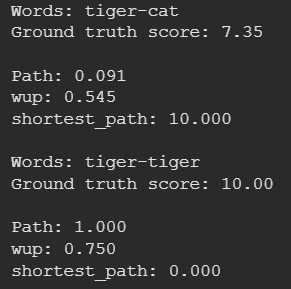


In [17]:
for w1, w2 in list(score_map)[:2]:

  print("\nWords: %s-%s\nGround truth score: %.2f" % (w1, w2, score_map[(w1, w2)]))

  ss1 = wn.synset(w1 + ".n.01")
  ss2 = wn.synset(w2 + ".n.01")

  print("\nPath: %.3f" % ss1.path_similarity(ss2), end=" ")
  print("\nwup: %.3f" % ss1.wup_similarity(ss2), end=" ")
  print("\nshortest_path: %.3f" % ss1.shortest_path_distance(ss2))


Words: five-month
Ground truth score: 3.38

Path: 0.111 
wup: 0.429 
shortest_path: 8.000

Words: stock-phone
Ground truth score: 1.62

Path: 0.067 
wup: 0.125 
shortest_path: 14.000


Compute several similarity measures for all word pairs

In [25]:
from itertools import product

list_pairs = list(score_map)
wup_list, true_list, path_list = [], [], []
lch_list = []

# для всех пар
for w1, w2 in list_pairs:

  try:
    all_w1 = wn.synsets(w1, pos="n")
    all_w2 = wn.synsets(w2, pos="n")

    # we add metrics of interest and expert reviews
    wups = [item1.wup_similarity(item2) for item1, item2 in product(all_w1, all_w2)]
    wup = max(wups) if len(wups)>0 else 0

    lchs = [item1.lch_similarity(item2) for item1, item2 in product(all_w1, all_w2)]
    lch = max(lchs) if len(lchs)>0 else 0


    paths = [item1.path_similarity(item2) for item1, item2 in product(all_w1, all_w2)]
    path = max(paths) if len(paths)>0 else 0

    if(len(wups)==0 or len(lchs)==0 or len(paths)==0):
      print(w1, w2, "misunderstanding")
      print(wups, lchs, paths)
      continue

    wup_list.append(wup)
    path_list.append(path)
    lch_list.append(lch)

    true_list.append(score_map[(w1, w2)])

  except Exception as e:
    print(w1, w2, "error:", e)

## Calculate Spearman's rank correlation

In [26]:
from scipy.stats import spearmanr

coef, p = spearmanr(wup_list, true_list)
print("wup  Spearman R: %.4f" % coef)

coef, p = spearmanr(path_list, true_list)
print("path Spearman R: %.4f" % coef)

coef, p = spearmanr(lch_list, true_list)
print("lch Spearman R: %.4f" % coef)



wup  Spearman R: 0.6462
path Spearman R: 0.6392
lch Spearman R: 0.6392


In [28]:
w = wn.synset('boy.n.01')
hyponyms_list = w.hyponyms()
print(len(hyponyms_list))
sorted_hyponyms = sorted(hyponyms_list, key=lambda h: h.name())
if sorted_hyponyms:
    first_hyponym_name = sorted_hyponyms[0].name()
else:
    first_hyponym_name = None
print(first_hyponym_name)

11
altar_boy.n.01
